In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm.auto import trange

%matplotlib inline
from matplotlib import pyplot as plt

def plot(src, cmap=None, title=None, size=(10, 10)):
    plt.rcParams['figure.figsize'] = size
    plt.imshow(src, cmap)
    plt.title(title)
    plt.axis("off")

In [3]:
from infrastructure.interface import DetectionData, ClassificationData
from service.interface import FrameData
from service.recognition import RecognitionService
from service.drawing import DrawingService

from infrastructure.detection import YOLODetector

### Init models

In [4]:
detector = YOLODetector(
    model_path='../detector_inference/weights/detector.pt', conf_thresh=0.6, device="cuda:0"
)
rec_service = RecognitionService(detector, None)
draw_service = DrawingService()

In [5]:
import os
video_path = '../cv_training/detector_training/datasets/construction_analytics/videos/output118.mp4'
frame_data_list = rec_service.process_video(video_path)

In [6]:
draw_service.process_video(video_path, frame_data_list)

  0%|          | 0/359 [00:00<?, ?it/s]

100%|██████████| 359/359 [00:10<00:00, 35.09it/s]


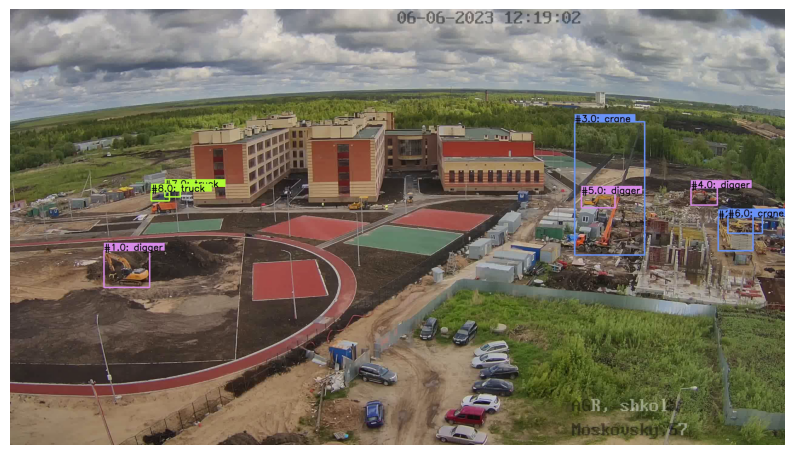

In [7]:
cap = cv2.VideoCapture(f"output/{os.path.basename(video_path)}")
_, frame = cap.read()
plot(frame[..., ::-1])